In [6]:
from pscore_data_reader_preproc import read_and_process_data, model_evaluation
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the data using the pre-processing code
x_train, y_train, x_test, y_test, train_team_values, test_team_values = read_and_process_data(
     r"E:\github_repos\Private_Projects\NCAA_FBS_AP_Ranking_Predictions\python_ap\scripts_and_data\data\score_pred_train_data.csv",
     r"E:\github_repos\Private_Projects\NCAA_FBS_AP_Ranking_Predictions\python_ap\scripts_and_data\data\score_pred_test_data.csv",
     True
)

# check to make sure the data looks right
x_train.shape
x_test.shape

train data has shape: (14648, 490)
test data has shape: (132, 490)


(132, 490)

In [14]:
# okay, lets build a grid search for ridge regression
# first set up the alpha values
alpha_values = np.logspace(-6, 6, 50) # 50 numbers between the -6 and 6 range in log space

# set the alpha values to a list
ridge_param_grid = {'alpha': alpha_values}

# Now set up ridge model
ridge = Ridge()

# lastly, build inital grid search model
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

In [15]:
# fit the final model
ridge_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-06, 1.75751062e-06, 3.08884360e-06, 5.42867544e-06,
       9.54095476e-06, 1.67683294e-05, 2.94705170e-05, 5.17947468e-05,
       9.10298178e-05, 1.59985872e-04, 2.81176870e-04, 4.94171336e-04,
       8.68511374e-04, 1.52641797e-03, 2.68269580e-03, 4.71486636e-03,
       8.28642773e-03, 1.45634848e-02, 2.55954792e-02, 4....
       7.19685673e+00, 1.26485522e+01, 2.22299648e+01, 3.90693994e+01,
       6.86648845e+01, 1.20679264e+02, 2.12095089e+02, 3.72759372e+02,
       6.55128557e+02, 1.15139540e+03, 2.02358965e+03, 3.55648031e+03,
       6.25055193e+03, 1.09854114e+04, 1.93069773e+04, 3.39322177e+04,
       5.96362332e+04, 1.04811313e+05, 1.84206997e+05, 3.23745754e+05,
       5.68986603e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

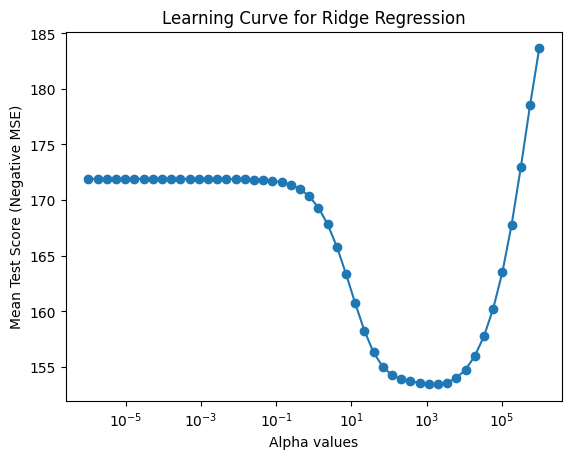

In [16]:
# Plot values across the params
plt.plot(alpha_values, -ridge_grid_search.cv_results_['mean_test_score'], marker='o')  # Negative MSE is stored
plt.xscale('log')  # Log scale to better visualize the values across the large range of alpha
plt.xlabel('Alpha values')
plt.ylabel('Mean Test Score (Negative MSE)')
plt.title('Learning Curve for Ridge Regression')
plt.show()

In [17]:
# final alpha values 
best_param = ridge_grid_search.best_params_['alpha']
best_param

2023.5896477251556

In [18]:
# fit final model using the best param
best_ridge = Ridge(alpha=best_param)
best_ridge.fit(x_train, y_train)

Ridge(alpha=2023.5896477251556)

In [19]:
# Model evaluation
y_pred_train = best_ridge.predict(x_train)

# evaluate model
model_evaluation(y_train, y_pred_train)

R-squared: 0.248
Mean Squared Error (MSE): 146.956
Mean Absolute Error (MAE): 9.740
